# Inicialización

## Cargar librerias

In [ ]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from math import factorial
from scipy import stats as st
from datetime import timedelta as td
from datetime import datetime

## Cargar los datos

In [ ]:
data1 = pd.read_csv('/datasets/project_sql_result_01.csv')
data2 = pd.read_csv('/datasets/project_sql_result_04.csv')
data3 = pd.read_csv('/datasets/project_sql_result_07.csv', parse_dates=['start_ts'])

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
data1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
data2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
 3   duration_minutes    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 33.5+ KB


In [ ]:
data3.head()

,start_ts,weather_conditions,duration_seconds,duration_minutes
0,2017-11-25 16:00:00,Good,2410,40
1,2017-11-25 14:00:00,Good,1920,32
2,2017-11-25 12:00:00,Good,1543,26
3,2017-11-04 10:00:00,Good,2512,42
4,2017-11-11 07:00:00,Good,1440,24


## Corregir tipos de datos

In [ ]:
data2['average_trips'] = data2['average_trips'].astype('int64').round()

In [ ]:
data3['duration_minutes'] = (data3['duration_seconds'].astype('int64') / 60).round().astype('int64')

- Aqui se corrige el tipo de datos de float a int64 y tambien se añade una columna de minutos para tener mas observable la cantidad de minutos promedio que dura un viaje.

# Analisis de datos

In [ ]:
data1_sorted = data1.sort_values(ascending=False, by='trips_amount').head(10)

In [ ]:
data2_sorted = data2.sort_values(ascending=False, by='average_trips').head(10)

- Aqui creamos dos variables con los dataframes ordenados de mayor a menor por sus respectivos campos cuantificables y dividimos la muestra en los primeros 10 valores

# Graficos

Text(0.5, 1.0, 'Viajes totales por compañia')

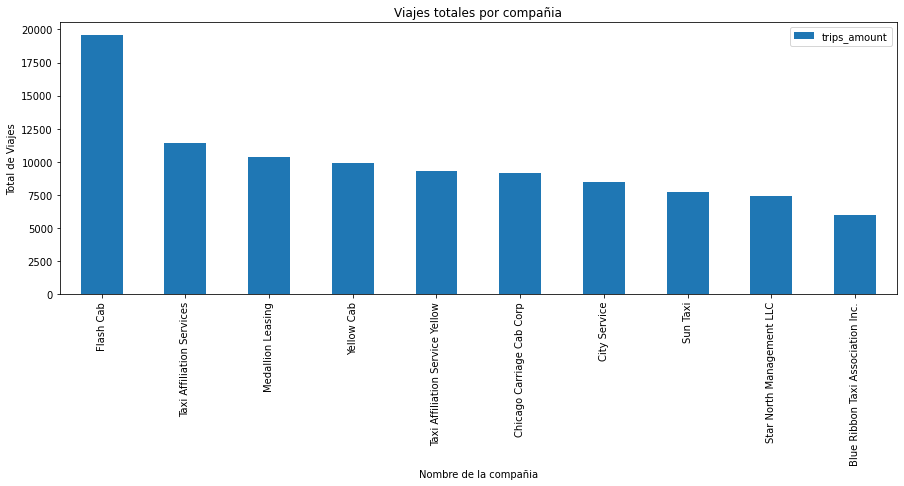

In [ ]:
# Se hace un grafico de barras para observar el total de viajes por compañia de taxi.
data1_sorted.plot(kind='bar', x='company_name', figsize=(15,5))
plt.ylabel('Total de Viajes')
plt.xlabel('Nombre de la compañia')
plt.title('Viajes totales por compañia')

- Tras analizar los datos podemos observar que las compañias con mas viajes completados serian Flash Cab con mucha diferencia de los demas, fuera de esa compañia las demas estan relativamente igualadas.

Text(0.5, 1.0, 'Viajes totales por compañia')

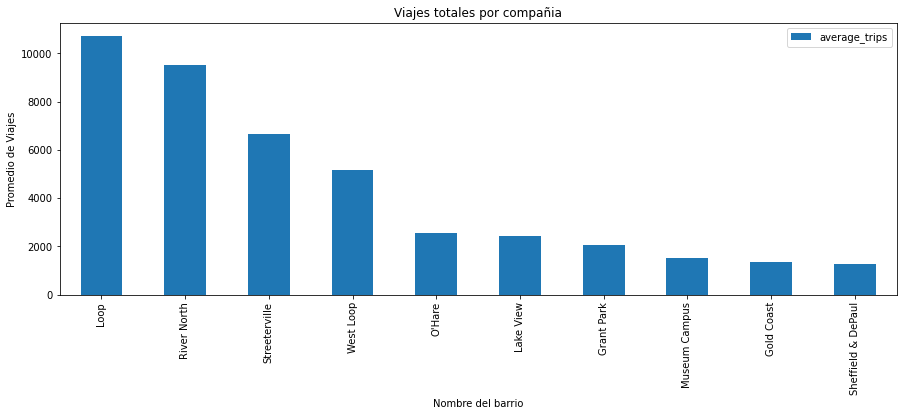

In [ ]:
# Se hace un grafico de barras para el promedio de los viajes y para el barrio destino.
data2_sorted.plot(kind='bar', x='dropoff_location_name', figsize=(15,5))
plt.ylabel('Promedio de Viajes')
plt.xlabel('Nombre del barrio')
plt.title('Viajes totales por compañia')

- Tras analizar los datos podemos observar que el barrio con mas promedio de viajes es Loop, seguido por River North muy cerca y los demas van disminuyendo bastante.

# Pruebas de hipotesis

- H₀ = La duración promedio de los viajes es igual desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.
- H₁ = La duración promedio de los viajes NO es igual desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

- Se plantean las hipotesis alternativa y nula basandonos en si la duracion promedio de los viajes es igual o no dependiendo de si el clima es lluvioso.

In [ ]:
con_lluvia = data3[data3['weather_conditions']=='Bad']
duracion_lluvia = con_lluvia['duration_minutes']
sin_lluvia = data3[data3['weather_conditions']=='Good']
duracion_sin_lluvia = sin_lluvia['duration_minutes']

In [ ]:
# Realizamos prueba de levene para comprobar que las varianzas no son iguales.
st.levene(duracion_lluvia, duracion_sin_lluvia, center='mean')

LeveneResult(statistic=0.8141493041819283, pvalue=0.3671001719543241)

- Al realizar la prueba de levene y obtener un pvalue menor a 0 podemos concluir que las varianzas son iguales.

In [ ]:
# Prueba las hipótesis
alpha = 0.05
results = st.ttest_ind(duracion_lluvia, duracion_sin_lluvia, equal_var=True)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  6.718708782388204e-12
Rechazamos la hipótesis nula


- Como podemos observar tras realizar un analisis estadistico de las duraciones en mimutos de los usuarios para climas con lluvia y sin lluvia nos encontramos con que tenemos suficiente evidencia para rechazar la hipotesis nula, lo que quiere decir que aceptamos la hipotesis alternativa que en este caso implica que la media no es igual para ambos escenarios.